# 날씨와 한강 방문객 수의 관계 분석
2023.10.28

## 1. 서울시 공공자전거 이용현황 API

https://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do

### 1-1. 데이터 로딩

In [90]:
# 2023년 1월부터 6월까지의 날짜 생성
months = {
    '01': 31, '02': 28, '03': 31, '04': 30, '05': 31, '06': 30
#     '07': 31, '08': 31, '09': 30, '10': 31, '11': 30, '12': 31
}
dates = []

for month, days in months.items():
    for day in range(1, days + 1):
        dates.append(f'2023-{month}-0{str(day)}' if day < 10 else f'2023-{month}-{str(day)}')
        
print(len(dates))

181


181일의 날짜 생성 완료

In [91]:
sum(months.values())

181

날짜 개수가 제대로 생성된 게 맞다.

In [60]:
results = []

# 181일 전체에 대한 데이터 불러오기
for date in dates:
    n = 0 #한 번에 최대 1000개씩 불러올 수 있어서, 여러 번에 나눠서 불러오기 위한 변수
    while True:
        # URL 구성
        url = f'http://openapi.seoul.go.kr:8088'
        params = {
            'key': '73495157686c6f7537384768786b71',
            'type': 'json',
            'service': 'tbCycleUseStatus',
            'start_index': str(n * 1000 + 1),
            'end_index': str((n + 1) * 1000),
            'start_data': date
        }
        for param in params.values():
            url += '/' + param

        # 완성된 URL로부터 데이터 수신
        response = requests.get(url)

        # 받아온 결과를 utf-8 디코딩
        response_data = response.content.decode('utf-8')

        # JSON 문자열을 딕셔너리로 파싱
        response_dict = json.loads(response_data)

        # 결과를 리스트에 저장하고 다음 페이지로 이동
        # 단, 결과가 없는 경우 해당 날짜를 종료
        try:
            results += response_dict['useStatus']['row']
            n += 1
        except:
            break
    
    print(f'{date} 데이터 수신 완료! 현재 데이터 개수 {len(results)}개')

2023-01-01 데이터 수신 완료! 현재 데이터 개수 2630개
2023-01-02 데이터 수신 완료! 현재 데이터 개수 5286개
2023-01-03 데이터 수신 완료! 현재 데이터 개수 7955개
2023-01-04 데이터 수신 완료! 현재 데이터 개수 10631개
2023-01-05 데이터 수신 완료! 현재 데이터 개수 13306개
2023-01-06 데이터 수신 완료! 현재 데이터 개수 15979개
2023-01-07 데이터 수신 완료! 현재 데이터 개수 18630개
2023-01-08 데이터 수신 완료! 현재 데이터 개수 21300개
2023-01-09 데이터 수신 완료! 현재 데이터 개수 23979개
2023-01-10 데이터 수신 완료! 현재 데이터 개수 26661개
2023-01-11 데이터 수신 완료! 현재 데이터 개수 29343개
2023-01-12 데이터 수신 완료! 현재 데이터 개수 32026개
2023-01-13 데이터 수신 완료! 현재 데이터 개수 34603개
2023-01-14 데이터 수신 완료! 현재 데이터 개수 37222개
2023-01-15 데이터 수신 완료! 현재 데이터 개수 39795개
2023-01-16 데이터 수신 완료! 현재 데이터 개수 42472개
2023-01-17 데이터 수신 완료! 현재 데이터 개수 45156개
2023-01-18 데이터 수신 완료! 현재 데이터 개수 47842개
2023-01-19 데이터 수신 완료! 현재 데이터 개수 50527개
2023-01-20 데이터 수신 완료! 현재 데이터 개수 53191개
2023-01-21 데이터 수신 완료! 현재 데이터 개수 55817개
2023-01-22 데이터 수신 완료! 현재 데이터 개수 58417개
2023-01-23 데이터 수신 완료! 현재 데이터 개수 61049개
2023-01-24 데이터 수신 완료! 현재 데이터 개수 63575개
2023-01-25 데이터 수신 완료! 현재 데이터 개수 66223개
2023-01-26 데이터 수신 완료! 현재 데이터

In [66]:
# 데이터프레임 생성
cycle_use_df = pd.DataFrame(results)
cycle_use_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,START_INDEX,END_INDEX
0,양천구,729. 서부식자재마트 건너편,2023-01-01,26,25,0,0
1,양천구,731. 서울시 도로환경관리센터,2023-01-01,38,37,0,0
2,양천구,732. 신월중학교,2023-01-01,22,25,0,0
3,양천구,733. 신정이펜하우스314동,2023-01-01,8,5,0,0
4,양천구,734. 신트리공원 입구,2023-01-01,32,28,0,0
...,...,...,...,...,...,...,...
483143,마포구,426. 서울신용보증재단,2023-06-30,56,55,0,0
483144,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),2023-06-30,70,71,0,0
483145,양천구,723. SBS방송국,2023-06-30,109,110,0,0
483146,양천구,725. 양강중학교앞 교차로,2023-06-30,42,16,0,0


In [92]:
cycle_use_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483148 entries, 0 to 483147
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   STA_LOC      483148 non-null  object
 1   RENT_NM      483148 non-null  object
 2   STAT_DATA    483148 non-null  object
 3   RENT_CNT     483148 non-null  object
 4   RTN_CNT      483148 non-null  object
 5   START_INDEX  483148 non-null  int64 
 6   END_INDEX    483148 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 29.5+ MB


데이터를 간략하게 확인해 본 결과
- 각 컬럼의 이름을 **한글로 변경**해야 할 필요성 느낌
- ```START_INDEX```와 ```END_INDEX```는 null값인 것 같으니 삭제해야 함
- ```RENT_CNT```와 ```RTN_CNT```는 str로 들어가 있으니 **int로 변경**해야 함

### 1-2. 데이터 확인 및 전처리

#### 1-2-1. 데이터프레임 전체

In [78]:
# 쓸데없는 컬럼 삭제 및 컬럼 이름 한글화
new_cycle_use_df = cycle_use_df.rename(columns={
    'STA_LOC': '그룹명',
    'RENT_NM': '대여소명',
    'STAT_DATA': '대여년월',
    'RENT_CNT': '대여건수',
    'RTN_CNT': '반납건수'
}).drop(['START_INDEX', 'END_INDEX'], axis=1)

new_cycle_use_df

,그룹명,대여소명,대여년월,대여건수,반납건수
0,양천구,729. 서부식자재마트 건너편,2023-01-01,26,25
1,양천구,731. 서울시 도로환경관리센터,2023-01-01,38,37
2,양천구,732. 신월중학교,2023-01-01,22,25
3,양천구,733. 신정이펜하우스314동,2023-01-01,8,5
4,양천구,734. 신트리공원 입구,2023-01-01,32,28
...,...,...,...,...,...
483143,마포구,426. 서울신용보증재단,2023-06-30,56,55
483144,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),2023-06-30,70,71
483145,양천구,723. SBS방송국,2023-06-30,109,110
483146,양천구,725. 양강중학교앞 교차로,2023-06-30,42,16


In [105]:
# 대여건수와 반납건수 컬럼을 int로 변경
new_cycle_use_df['대여건수'] = new_cycle_use_df['대여건수'].astype(int)
new_cycle_use_df['반납건수'] = new_cycle_use_df['반납건수'].astype(int)

new_cycle_use_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483148 entries, 0 to 483147
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   그룹명     483148 non-null  object
 1   대여소명    483148 non-null  object
 2   대여년월    483148 non-null  object
 3   대여건수    483148 non-null  int32 
 4   반납건수    483148 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 18.4+ MB


#### 1-2-2. 그룹명

In [112]:
new_cycle_use_df['그룹명'].nunique()

25

In [110]:
new_cycle_use_df['그룹명'].unique()

array(['양천구', '광진구', '은평구', '성동구', '강동구', '강서구', '송파구', '중랑구', '마포구',
       '강북구', '노원구', '도봉구', '금천구', '동작구', '관악구', '서초구', '중구', '종로구',
       '강남구', '서대문구', '성북구', '구로구', '동대문구', '영등포구', '용산구'], dtype=object)

25개 행정구에 대한 데이터임을 확인

In [156]:
# 행정구별 행 개수 확인
rows_by_group = new_cycle_use_df['그룹명'].value_counts().sort_values(ascending=False).to_frame()

rows_by_group

,그룹명
송파구,38460
강서구,33103
강남구,29223
영등포구,26757
서초구,25043
노원구,24329
마포구,21482
강동구,21441
구로구,19955
양천구,19533


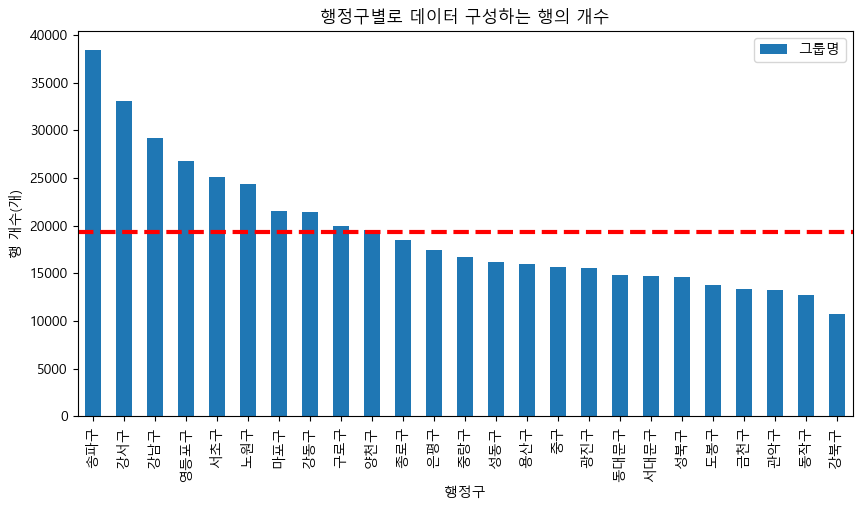

In [157]:
# 시각화
rows_by_group.plot(kind='bar', figsize=(10, 5))
plt.title('행정구별로 데이터 구성하는 행의 개수')
plt.xlabel('행정구')
plt.ylabel('행 개수(개)')
plt.axhline(rows_by_group.mean().values[0], color='red', linestyle='--', linewidth='3')
plt.show()

데이터 개수가 평균보다 많은 곳은 **송파구, 강서구, 강남구, 영등포구, 서초구, 노원구, 마포구, 강동구, 구로구, 양천구**

In [158]:
rows_by_group.loc['양천구'].values[0] > rows_by_group.mean().values[0]

True

사실 양천구는 아리까리해서 직접 확인해봤다

In [163]:
# 행정구별 총 대여건수와 총 반납건수 확인
sum_by_group = new_cycle_use_df.groupby('그룹명').agg({'대여건수': 'sum', '반납건수': 'sum'})
['합계'] = sum_by_group['대여건수'] + sum_by_group['반납건수']
sum_by_group = sum_by_group.sort_values('합계', ascending=False)
sum_by_group

,대여건수,반납건수,합계
그룹명,,,
강서구,2425742,2408730,4834472
송파구,2019359,2001083,4020442
영등포구,1756829,1717698,3474527
노원구,1306650,1294840,2601490
양천구,1221741,1220666,2442407
마포구,1066569,1066762,2133331
광진구,1053185,1032267,2085452
강동구,933894,939209,1873103
성동구,864134,855186,1719320


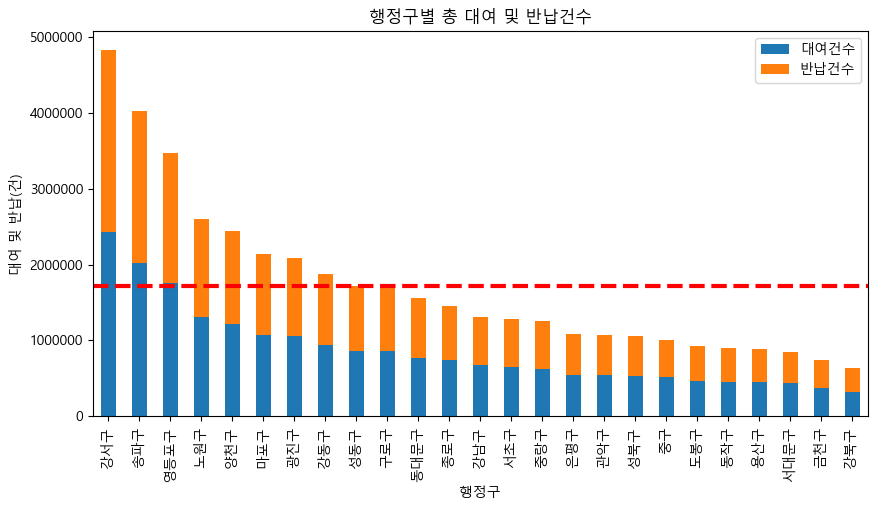

In [172]:
# 시각화
sum_by_group[['대여건수', '반납건수']].plot(kind='bar', figsize=(10, 5), stacked=True)
plt.title('행정구별 총 대여 및 반납건수')
plt.xlabel('행정구')
plt.ylabel('대여 및 반납(건)')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.axhline(sum_by_group['합계'].mean(), color='red', linestyle='--', linewidth='3')
plt.show()

In [175]:
sum_by_group.loc['성동구', '합계'] > sum_by_group['합계'].mean()

True

In [176]:
sum_by_group.loc['구로구', '합계'] > sum_by_group['합계'].mean()

False

총 대여 및 반납건수가 평균 이상인 곳은 **강서구, 송파구, 영등포구, 노원구, 양천구, 마포구, 광진구, 강동구, 성동구**

#### 1-2-3. 대여소명

In [177]:
# 대여소 개수
new_cycle_use_df['대여소명'].nunique()

2739

대여소 종류가 2739개나 된다.

In [182]:
# 행정구별 대여소 개수 
station_in_group = new_cycle_use_df.groupby('그룹명').agg({'대여소명': 'nunique'}).sort_values('대여소명', ascending=False)
station_in_group

,대여소명
그룹명,
송파구,218
강서구,187
강남구,166
영등포구,151
서초구,147
노원구,137
강동구,122
마포구,122
구로구,114


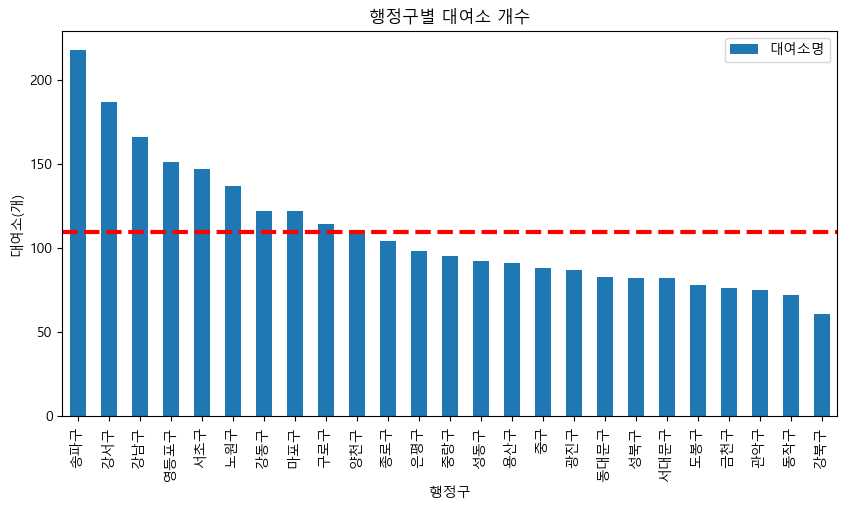

In [212]:
# 시각화
station_in_group.plot(kind='bar', figsize=(10, 5))
plt.title('행정구별 대여소 개수')
plt.xlabel('행정구')
plt.ylabel('대여소(개)')
plt.axhline(station_in_group.mean().values[0], color='red', linestyle='--', linewidth='3')
plt.show()

어디서 본 그래프 같네...? 사실 날짜별로 대여소마다의 데이터가 구성되어 있을 테니 행의 개수가 곧 대여소 개수였을 것이다...!

In [213]:
# 한강공원이 들어가는 대여소 개수 확인
new_cycle_use_df[new_cycle_use_df['대여소명'].str.contains('한강공원')]['대여소명'].unique()

array(['4217. 한강공원 망원나들목'], dtype=object)

In [207]:
new_cycle_use_df[new_cycle_use_df['대여소명'].str.contains('유원지')]['대여소명'].unique()

array(['588. 뚝섬 유원지역', '502. 뚝섬유원지역 1번출구 앞'], dtype=object)

In [211]:
new_cycle_use_df[new_cycle_use_df['대여소명'].str.contains('선착장')]['대여소명'].unique()

array(['260. 여의도 마리나선착장 앞'], dtype=object)

In [214]:
new_cycle_use_df[new_cycle_use_df['대여소명'].str.contains('나루')]['대여소명'].unique()

array(['1296. 석촌호수교차로 (송파나루근린공원 앞)',
       '1191. 마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)', '2701. 마곡나루역 5번출구 뒤편',
       '2620. 송파나루역 4번 출구옆', '2715.마곡나루역 2번 출구 ', '2728.마곡나루역 3번 출구',
       '119. 서강나루 공원', '3564.나루마당', '3573.광나루안전체험관', '4484. 잠실나루역4번출구뒤',
       '4485. 잠실나루역 고가하부', '4859. 잠실나루 나들목', '576. 광나루역 3번 출구',
       '1004. 삼성광나루아파트 버스정류장', '1209. 잠실나루역 (2번 출구 쪽)',
       '207. 여의나루역 1번출구 앞'], dtype=object)

대여소 이름으로부터 **한강공원과 관련 있는 데이터**를 뽑아낼 방법은 더 생각해 봐야 할 듯

#### 1-2-4. 대여년월

In [188]:
len(dates)

181

181일 모두 제대로 불러와졌는지 확인하기

In [189]:
new_cycle_use_df['대여년월'].nunique()

180

In [108]:
new_cycle_use_df['대여년월'].nunique() == len(dates)

False

뭔가 문제가 있는 것 같으니 직접 확인해보자

In [109]:
for date in dates:
    if date not in new_cycle_use_df['대여년월'].unique():
        print(date)

2023-06-26


**2023년 6월 26일이 누락**되어 있다

#### 1-2-5. 대여건수, 반납건수

정수형 데이터들이니까 분포를 보자.

In [193]:
new_cycle_use_df[['대여건수', '반납건수']].describe()

,대여건수,반납건수
count,483148.000000,483148.000000
mean,44.678602,44.129946
std,49.864576,51.623134
min,0.000000,0.000000
25%,13.000000,11.750000
50%,30.000000,28.000000
75%,59.000000,59.000000
max,1384.000000,1573.000000


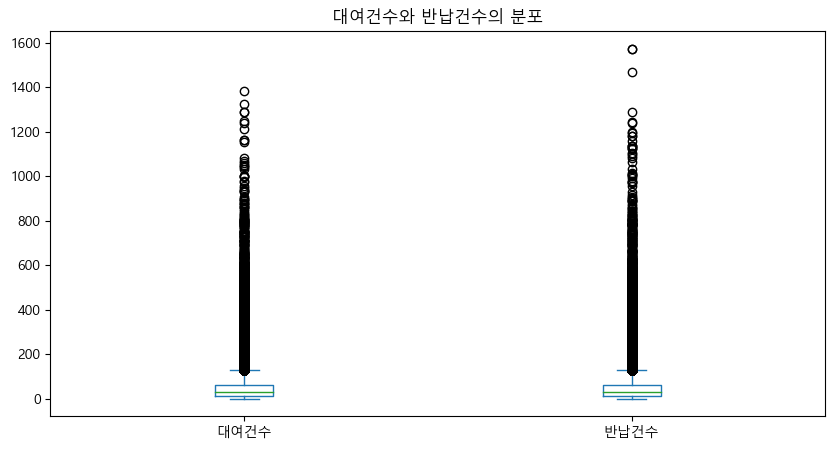

In [194]:
new_cycle_use_df[['대여건수', '반납건수']].plot(kind='box', figsize=(10, 5))
plt.title('대여건수와 반납건수의 분포')
plt.show()

대략 30~40건 내외가 일반적인 것 같다.

그런데 하루 동안 대여소에서 1384건의 대여와 1573건의 반납이 발생하는 경우가 있다고...?

In [195]:
new_cycle_use_df[new_cycle_use_df['대여건수'] == 1384]

,그룹명,대여소명,대여년월,대여건수,반납건수
245492,마포구,4217. 한강공원 망원나들목,2023-04-02,1384,1573


4월 2일 한강공원 망원나들목이라고 한다. 날이 좋을수록 한강공원을 많이 이용하지 않을까 하는 문제 정의에 완벽히 부합하는 예시가 나왔다!

---

## 2. 한강공원 주차장 일별 이용 현황 API

https://data.seoul.go.kr/dataList/OA-21084/S/1/datasetView.do

### 2-1. 데이터 로딩

In [246]:
# 초기 세팅
park_results = []
n = 0
is_finished = False

while True:
    # URL 구성
    url = f'http://openapi.seoul.go.kr:8088'
    params = {
        'key': '73495157686c6f7537384768786b71',
        'type': 'json',
        'service': 'TbUseDaystatusView',
        'start_index': str(n * 1000 + 1),
        'end_index': str((n + 1) * 1000),
    }
    for param in params.values():
        url += '/' + param

    # 완성된 URL로부터 데이터 수신
    response = requests.get(url)

    # 받아온 결과를 utf-8 디코딩
    response_data = response.content.decode('utf-8')

    # JSON 문자열을 딕셔너리로 파싱
    response_dict = json.loads(response_data)

    # 2023년 1월부터 6월까지의 결과를 리스트에 저장
    # 단, 2022년 데이터로 넘어가는 경우 종료
    result = response_dict[params['service']]['row']
    for r in result:
        if r['DT'][:4] == '2022':
            is_finished = True
            break
        elif r['DT'][5:7] in months.keys():
            park_results.append(r)
        else:
            continue
    
    # 종료 상황이 아니면 다음 페이지로 넘어가서 계속 불러오도록 구현
    if is_finished:
        print(f'''{r['DT']} 데이터 이전까지 총 {len(park_results)}개의 데이터 불러오기 완료!''')
        break
    else:
        n += 1
        print(f'''데이터 불러오는 중... 현재 {r['DT']} 데이터까지 완료 (데이터 개수: {len(park_results)}개)''')

데이터 불러오는 중... 현재 2023/09/23 데이터까지 완료 (데이터 개수: 0개)
데이터 불러오는 중... 현재 2023/08/19 데이터까지 완료 (데이터 개수: 0개)
데이터 불러오는 중... 현재 2023/07/11 데이터까지 완료 (데이터 개수: 0개)
데이터 불러오는 중... 현재 2023/06/05 데이터까지 완료 (데이터 개수: 714개)
데이터 불러오는 중... 현재 2023/04/29 데이터까지 완료 (데이터 개수: 1714개)
데이터 불러오는 중... 현재 2023/03/24 데이터까지 완료 (데이터 개수: 2714개)
데이터 불러오는 중... 현재 2023/02/15 데이터까지 완료 (데이터 개수: 3714개)
데이터 불러오는 중... 현재 2023/01/09 데이터까지 완료 (데이터 개수: 4714개)
2022/12/31 데이터 이전까지 총 4948개의 데이터 불러오기 완료!


In [247]:
# 데이터프레임 생성
park_df = pd.DataFrame(park_results)
park_df

,PARKING_DIV_CD,PARKING_NM,USE_CNT,USE_MIN,DT
0,PLT-009,반포1주차장,921.0,36406.0,2023/06/30
1,PLT-008,여의도5주차장,320.0,91954.0,2023/06/30
2,PLT-008,여의도1주차장,2338.0,353012.0,2023/06/30
3,PLT-004,이촌2주차장,270.0,17168.0,2023/06/30
4,PLT-002,"난지1,2,3주차장",1731.0,94452.0,2023/06/30
...,...,...,...,...,...
4943,PLT-011,잠실4주차장,1062.0,57831.0,2023/01/01
4944,PLT-007,양화2주차장,86.0,6180.0,2023/01/01
4945,PLT-001,강서1주차장,195.0,8590.0,2023/01/01
4946,PLT-003,"망원2,3주차장",1208.0,87599.0,2023/01/01


In [248]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4948 entries, 0 to 4947
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PARKING_DIV_CD  4948 non-null   object 
 1   PARKING_NM      4948 non-null   object 
 2   USE_CNT         4948 non-null   float64
 3   USE_MIN         4948 non-null   float64
 4   DT              4948 non-null   object 
dtypes: float64(2), object(3)
memory usage: 193.4+ KB


살펴본 결과
- 마찬가지로 컬럼명 **한글화 필요**
- 날짜 데이터가 아까는 yyyy-mm-dd였는데 이번에는 yyyy/mm/dd

### 2-2. 데이터 확인 및 전처리

#### 2-2-1. 데이터프레임 전체

In [249]:
new_park_df = park_df.rename(columns={
    'PARKING_DIV_CD': '지구별',
    'PARKING_NM': '주차장명',
    'USE_CNT': '주차대수',
    'USE_MIN': '이용시간',
    'DT': '날짜'
})

new_park_df

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-009,반포1주차장,921.0,36406.0,2023/06/30
1,PLT-008,여의도5주차장,320.0,91954.0,2023/06/30
2,PLT-008,여의도1주차장,2338.0,353012.0,2023/06/30
3,PLT-004,이촌2주차장,270.0,17168.0,2023/06/30
4,PLT-002,"난지1,2,3주차장",1731.0,94452.0,2023/06/30
...,...,...,...,...,...
4943,PLT-011,잠실4주차장,1062.0,57831.0,2023/01/01
4944,PLT-007,양화2주차장,86.0,6180.0,2023/01/01
4945,PLT-001,강서1주차장,195.0,8590.0,2023/01/01
4946,PLT-003,"망원2,3주차장",1208.0,87599.0,2023/01/01


#### 2-2-2. 지구별

In [258]:
new_park_df['지구별'].nunique()

11

In [259]:
new_park_df['지구별'].unique()

array(['PLT-009', 'PLT-008', 'PLT-004', 'PLT-002', 'PLT-005', 'PLT-003',
       'PLT-007', 'PLT-011', 'PLT-010', 'PLT-006', 'PLT-001'],
      dtype=object)

총 11개라는데 솔직히 별로 직관적이지도 않고 뭔지 잘 모르겠다. 각 지구별로 주차장 이름을 찍어봐야 알 수 있을 것 같다.

In [306]:
# groupby 객체를 generator로 생성
area_iter = iter(new_park_df.groupby('지구별'))

# generator를 돌려서 각 지구별 주차장명 개수 출력
for idx, df in area_iter:
    print('-' * 30)
    print(idx, df['주차장명'].value_counts(), sep='\n')

------------------------------
PLT-001
강서1주차장    180
Name: 주차장명, dtype: int64
------------------------------
PLT-002
난지1,2,3주차장    179
Name: 주차장명, dtype: int64
------------------------------
PLT-003
망원1주차장      180
망원2,3주차장    180
Name: 주차장명, dtype: int64
------------------------------
PLT-004
이촌2주차장      180
이촌1주차장      180
이촌3,4주차장    180
Name: 주차장명, dtype: int64
------------------------------
PLT-005
뚝섬4주차장    180
뚝섬1주차장    180
뚝섬3주차장    180
뚝섬2주차장    180
Name: 주차장명, dtype: int64
------------------------------
PLT-006
광나루1,2주차장    180
광나루3주차장      180
광나루4주차장      101
Name: 주차장명, dtype: int64
------------------------------
PLT-007
양화1주차장        180
양화3,4,5주차장    180
양화2주차장        179
Name: 주차장명, dtype: int64
------------------------------
PLT-008
여의도5주차장    180
여의도3주차장    180
여의도2주차장    180
여의도4주차장    179
여의도1주차장    177
Name: 주차장명, dtype: int64
------------------------------
PLT-009
반포2,3주차장    179
반포1주차장      174
Name: 주차장명, dtype: int64
------------------------------
PLT-010
잠원2-6

지구별이라는 게 공원별을 뜻하는 모양이다.

In [318]:
def set_park_name(name):
    '''
    주차장명으로부터 두 자리 또는 세 자리의 공원명을 반환
    '''
    try:
        # 3번째 자리가 숫자면 공원 이름은 두 자리
        int(name[2])
        return name[:2]
    except:
        # 3번째 자리가 숫자가 아니면 공원 이름은 세 자리
        return name[:3]

new_park_df['공원명'] = new_park_df['주차장명'].apply(set_park_name)
new_park_df

,지구별,주차장명,주차대수,이용시간,날짜,공원명
0,PLT-009,반포1주차장,921.0,36406.0,2023-06-30,반포
1,PLT-008,여의도5주차장,320.0,91954.0,2023-06-30,여의도
2,PLT-008,여의도1주차장,2338.0,353012.0,2023-06-30,여의도
3,PLT-004,이촌2주차장,270.0,17168.0,2023-06-30,이촌
4,PLT-002,"난지1,2,3주차장",1731.0,94452.0,2023-06-30,난지
...,...,...,...,...,...,...
4943,PLT-011,잠실4주차장,1062.0,57831.0,2023-01-01,잠실
4944,PLT-007,양화2주차장,86.0,6180.0,2023-01-01,양화
4945,PLT-001,강서1주차장,195.0,8590.0,2023-01-01,강서
4946,PLT-003,"망원2,3주차장",1208.0,87599.0,2023-01-01,망원


In [319]:
# 지구별 주차대수 및 이용시간 평균
mean_by_area = new_park_df.groupby('공원명').agg({'주차대수': 'mean', '이용시간': 'mean'})
mean_by_area

,주차대수,이용시간
공원명,,
강서,194.266667,13733.622222
광나루,493.082430,35159.242950
난지,1798.067039,119790.871508
뚝섬,537.352778,53295.886111
망원,674.997222,60438.825000
반포,1733.878187,126071.878187
양화,382.424861,33880.710575
여의도,1032.789062,184320.101562
이촌,437.048148,37770.844444


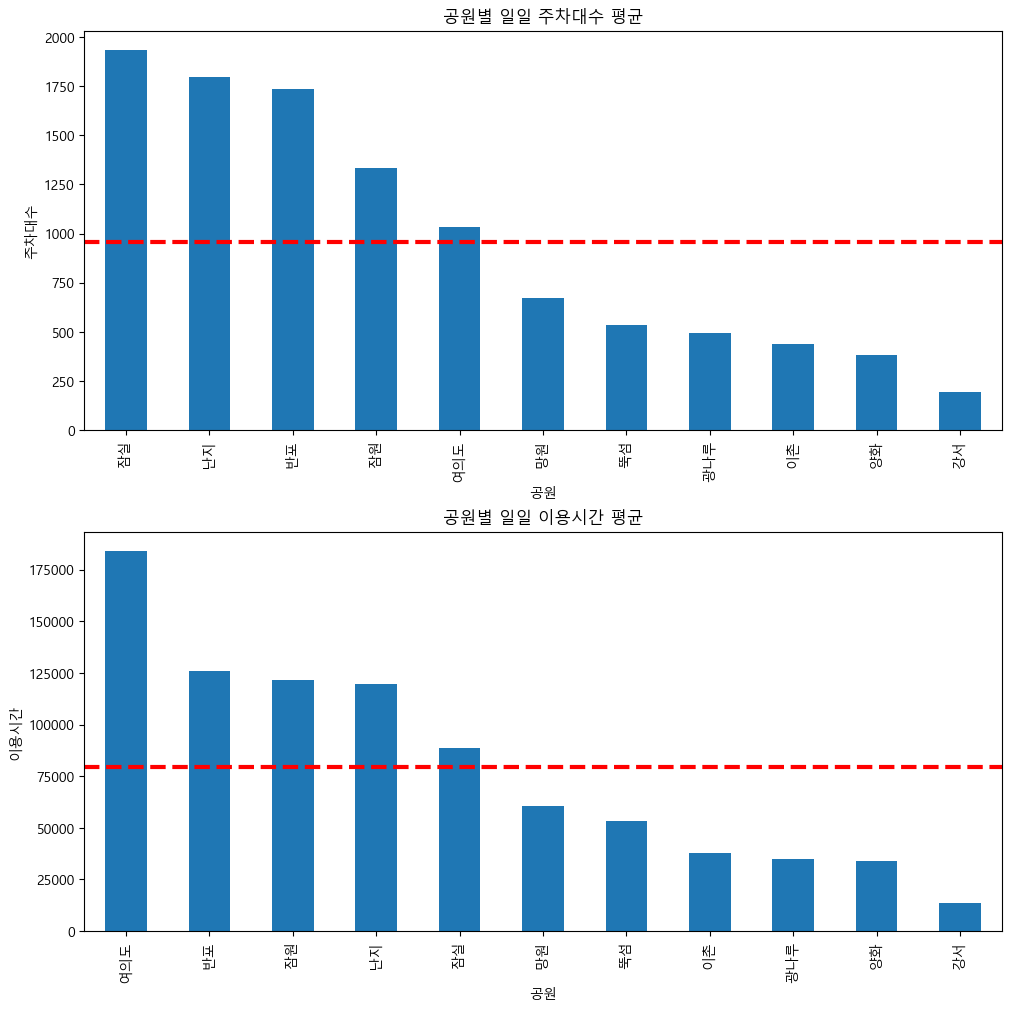

In [320]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), constrained_layout=True)

# 주차대수 평균 시각화
mean_by_area['주차대수'].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_title('공원별 일일 주차대수 평균')
axes[0].set_xlabel('공원')
axes[0].set_ylabel('주차대수')
axes[0].axhline(mean_by_area['주차대수'].mean(), color='red', linestyle='--', linewidth='3')

# 이용시간 평균 시각화
mean_by_area['이용시간'].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('공원별 일일 이용시간 평균')
axes[1].set_xlabel('공원')
axes[1].set_ylabel('이용시간')
axes[1].axhline(mean_by_area['이용시간'].mean(), color='red', linestyle='--', linewidth='3')

plt.show()

순서는 조금씩 다르지만 **잠실, 난지, 반포, 잠원, 여의도**가 TOP5를 구성하고 있으며, 일일 주차대수 평균과 일일 이용시간 평균 모두 평균치를 웃돌고 있다. 나머지 6개의 공원은 두 지표 모두에서 평균치를 밑돌고 있다.

#### 2-2-3. 주차장명

In [321]:
new_park_df['주차장명'].nunique()

28

In [322]:
new_park_df['주차장명'].unique()

array(['반포1주차장', '여의도5주차장', '여의도1주차장', '이촌2주차장', '난지1,2,3주차장', '반포2,3주차장',
       '뚝섬4주차장', '망원1주차장', '양화1주차장', '여의도4주차장', '잠실1주차장', '여의도3주차장',
       '뚝섬1주차장', '잠원2-6주차장', '잠원1주차장', '광나루4주차장', '이촌1주차장', '잠실4주차장',
       '뚝섬3주차장', '양화2주차장', '광나루1,2주차장', '뚝섬2주차장', '망원2,3주차장',
       '양화3,4,5주차장', '여의도2주차장', '이촌3,4주차장', '강서1주차장', '광나루3주차장'],
      dtype=object)

총 28개 주차장이다.

In [353]:
# 주차장별 주차대수 및 이용시간 평균
mean_by_park = new_park_df.groupby('주차장명').agg({'주차대수': 'mean', '이용시간': 'mean'})
mean_by_park

,주차대수,이용시간
주차장명,,
강서1주차장,194.266667,13733.622222
"광나루1,2주차장",688.861111,50977.505556
광나루3주차장,506.922222,37326.488889
광나루4주차장,119.504950,3105.861386
"난지1,2,3주차장",1798.067039,119790.871508
뚝섬1주차장,266.138889,18836.477778
뚝섬2주차장,757.222222,91486.344444
뚝섬3주차장,427.594444,42978.511111
뚝섬4주차장,698.455556,59882.211111


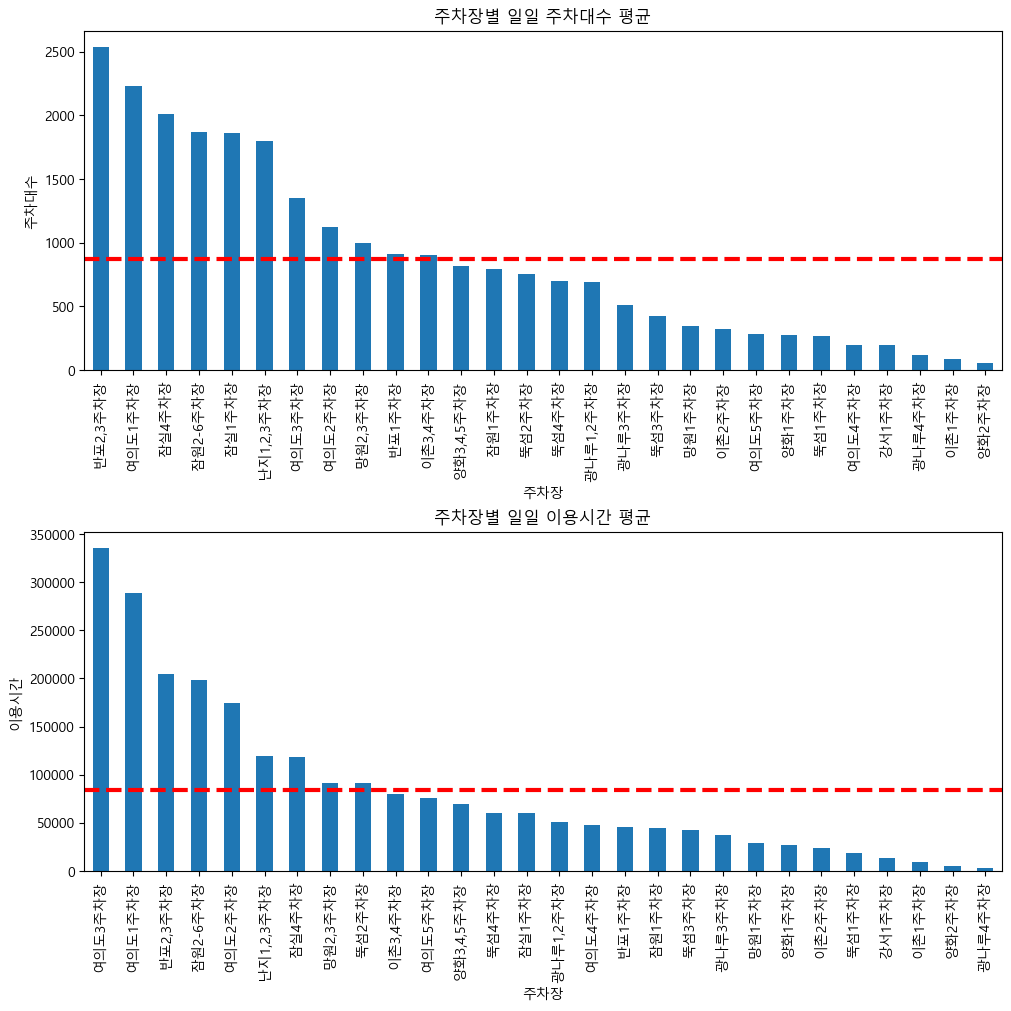

In [354]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), constrained_layout=True)

# 주차대수 평균 시각화
mean_by_park['주차대수'].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_title('주차장별 일일 주차대수 평균')
axes[0].set_xlabel('주차장')
axes[0].set_ylabel('주차대수')
axes[0].axhline(mean_by_park['주차대수'].mean(), color='red', linestyle='--', linewidth='3')

# 이용시간 평균 시각화
mean_by_park['이용시간'].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('주차장별 일일 이용시간 평균')
axes[1].set_xlabel('주차장')
axes[1].set_ylabel('이용시간')
axes[1].axhline(mean_by_park['이용시간'].mean(), color='red', linestyle='--', linewidth='3')

plt.show()

근데 사실 이렇게만 봐서는 잘 모르겠다.

#### 2-2-4. 주차대수, 이용시간

#### 2-2-5. 날짜

In [254]:
# yyyy-mm-dd 형식으로 맞춰주기
new_park_df['날짜'] = new_park_df['날짜'].apply(lambda x:x.replace('/', '-'))
new_park_df

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-009,반포1주차장,921.0,36406.0,2023-06-30
1,PLT-008,여의도5주차장,320.0,91954.0,2023-06-30
2,PLT-008,여의도1주차장,2338.0,353012.0,2023-06-30
3,PLT-004,이촌2주차장,270.0,17168.0,2023-06-30
4,PLT-002,"난지1,2,3주차장",1731.0,94452.0,2023-06-30
...,...,...,...,...,...
4943,PLT-011,잠실4주차장,1062.0,57831.0,2023-01-01
4944,PLT-007,양화2주차장,86.0,6180.0,2023-01-01
4945,PLT-001,강서1주차장,195.0,8590.0,2023-01-01
4946,PLT-003,"망원2,3주차장",1208.0,87599.0,2023-01-01


In [255]:
new_park_df['날짜'].nunique()

180

이번에도 하루가 없네?

In [256]:
for date in dates:
    if date not in new_park_df['날짜'].unique():
        print(date)

2023-06-04


이번엔 6월 4일의 데이터가 비어있다.

## 3. 기상청_지상(종관, ASOS) 일자료 조회서비스 API

https://www.data.go.kr/data/15059093/openapi.do

(추후 진행할 내용)
- 기상청 API를 통해 2023년 1월 1일부터 6월 30일까지의 데이터 불러오기
    - 11개 한강공원에 해당하는 지역의 데이터
    - 평균 상대습도(avgRhm), 평균 기온(avgTa), 합계 일사(sumGsr) 또는 합계 일조 시간(sumSsHr), 평균 전운량(avgTca), 일강수량(sumRn) 등
- 각 컬럼별 분포 확인
- '날씨가 좋을 때'의 기준 설정

## 4. 가설 검정

(추후 진행할 내용)

**날씨 좋은 날에는 한강공원 차량 방문이 더 많나?**
- H0: 날씨가 좋은 날의 '일일 주차대수 평균'과 날씨가 나쁜 날의 '일일 주차대수 평균' 사이에는 차이가 없다.
- H1: 날씨가 좋은 날의 '일일 주차대수 평균'은 날씨가 나쁜 날의 '일일 주차대수 평균'보다 많다.


- H0: 날씨가 좋은 날의 '일일 이용시간 평균'과 날씨가 나쁜 날의 '일일 이용시간 평균' 사이에는 차이가 없다.
- H1: 날씨가 좋은 날의 '일일 이용시간 평균'은 날씨가 나쁜 날의 '일일 이용시간 평균'보다 많다.


**날씨 좋은 날에는 공공자전거 더 많이 타나?**
- H0: 날씨가 좋은 날의 '한강공원 대여+반납건수'와 날씨가 나쁜 날의 '한강공원 대여+반납건수' 사이에는 차이가 없다.
- H1: 날씨가 좋은 날의 '한강공원 대여+반납건수'는 날씨가 나쁜 날의 '한강공원 대여+반납건수'보다 많다.


- H0: 날씨가 좋은 날의 '전체 대여+반납건수'와 날씨가 나쁜 날의 '전체 대여+반납건수' 사이에는 차이가 없다.
- H1: 날씨가 좋은 날의 '전체 대여+반납건수'는 날씨가 나쁜 날의 '전체 대여+반납건수'보다 많다.

**다른 지역보다 한강공원에서 자전거를 더 많이 타나?**
- H0: 한강공원의 '대여+반납건수'와 전체 지역의 '대여+반납건수' 사이에는 차이가 없다.
- H1: 한강공원의 '대여+반납건수'는 전체 지역의 '대여+반납건수'보다 많다.